    0    1    2     3     4     5    6    7    8    9     10    11    12  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  13.0  15.0  10.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0   0.0  11.0  16.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0   3.0  16.0  15.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  13.0   6.0  15.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0   0.0   7.0   8.0   

     13   14   15   16   17    18    19    20    21   22   23   24   25    26  \
0  15.0  5.0  0.0  0.0  3.0  15.0   2.0   0.0  11.0  8.0  0.0  0.0  4.0  12.0   
1   9.0  0.0  0.0  0.0  0.0   3.0  15.0  16.0   6.0  0.0  0.0  0.0  7.0  15.0   
2  14.0  0.0  0.0  0.0  0.0   8.0  13.0   8.0  16.0  0.0  0.0  0.0  0.0   1.0   
3   4.0  0.0  0.0  0.0  2.0   1.0  13.0  13.0   0.0  0.0  0.0  0.0  0.0   2.0   
4   0.0  0.0  0.0  0.0  0.0   1.0  13.0   6.0   2.0  2.0  0.0  0.0  0.0   7.0   

     27    28    29   30   31   32   33    34    35    3

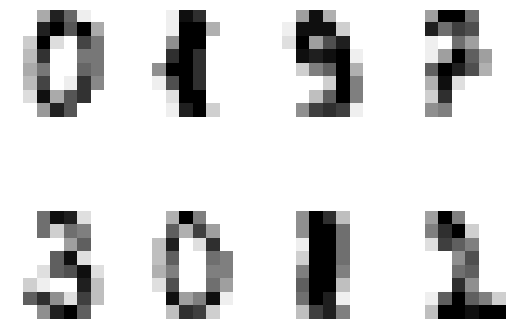

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

images = load_digits()
image_data = images['data']
df = pd.DataFrame(image_data)
pd.set_option('display.max_columns', None)

print(df.head())

fig = plt.figure()
gs = GridSpec(2, 4, figure=fig)

images_to_display = [image_data[0], image_data[99], image_data[199], image_data[299], image_data[999], image_data[1099], image_data[1199], image_data[1299]]
# print(images_to_display)

# print(image_data[1].shape)

for i in range(len(images_to_display)):
    ax = fig.add_subplot(gs[i])
    ax.imshow(images_to_display[i].reshape(8, 8), cmap='gray_r')
    ax.axis('off')

plt.show()


In [17]:
# checking if the model is unbalanced
target = images['target']
target_series = pd.Series(target)
values = target_series.value_counts()
print(values) # It looks balanced. And based on this I can assume a baseline model would be about 10% accurate. I'm going to use gini impurity to determine the probability of misclassifying a label https://app.dataquest.io/c/140/m/751/foundations-of-decision-trees/9/classification-trees-gini-impurity?path=2&slug=data-scientist&version=1')

def gini_impurity(n, class_counts):
    # Calculate the Gini impurity
    impurity = 1
    for count in class_counts:
        prob_of_label = count / n
        impurity -= prob_of_label**2
        
    return impurity

total_values = target_series.size
print(total_values)

print(gini_impurity(total_values, [178,182,177,183,181,182,181,179,174, 180])) # I'm putting in the value counts from 0-9 in order but I don't have to do it in order # It's 0.8999789112442085. I'm realizing it doesn't make sense to call this a baseline model since it's not something someone could do to predict new values. While they could predict the mean. So 10% would be a baseline model.

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64
1797
0.8999789112442085


### K Nearest Neighbors

[0.9888728037614452, 0.9821912892848305, 0.9872011878247959, 0.9833073496659243, 0.9849777282850779, 0.9827517941103686, 0.9844221727295223, 0.9805270972531551, 0.9827567433803515]


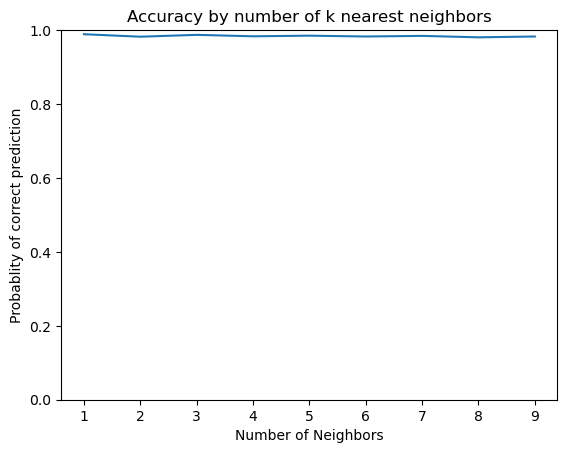

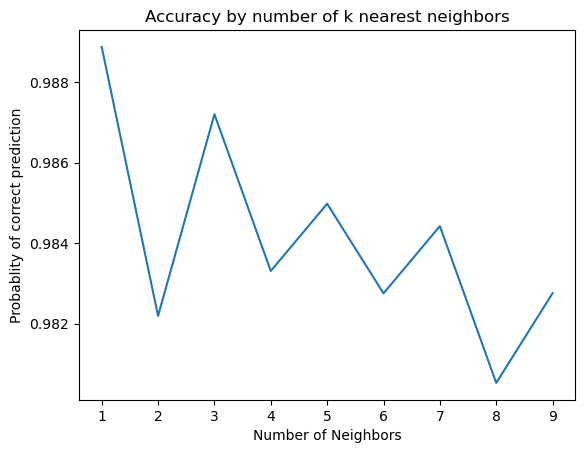

In [34]:
from sklearn.model_selection import cross_validate, KFold # , cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = image_data
y = target

# knn = KNeighborsClassifier(n_neighbors=5)
# results = cross_validate(knn, X, y, cv = 4)
# test_scores = results['test_score']
# print(test_scores)
# mean_test_scores = test_scores.mean()
# print(mean_test_scores)

def create_k_neighbors_model(n_neighbors, folds):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Create a k-fold cross-validation object with a fixed random state
    cv = KFold(n_splits=folds, shuffle=True, random_state=2)
    results = cross_validate(knn, X, y, cv=cv)
    test_scores = results['test_score']
#     print(test_scores)
    mean_test_scores = test_scores.mean()
#     print(mean_test_scores)
    return mean_test_scores

accuracies = []

accuracies.append(create_k_neighbors_model(1,4))
accuracies.append(create_k_neighbors_model(2,4))
accuracies.append(create_k_neighbors_model(3,4))
accuracies.append(create_k_neighbors_model(4,4))
accuracies.append(create_k_neighbors_model(5,4))
accuracies.append(create_k_neighbors_model(6,4))
accuracies.append(create_k_neighbors_model(7,4))
accuracies.append(create_k_neighbors_model(8,4))
accuracies.append(create_k_neighbors_model(9,4))
print(accuracies)

import matplotlib.pyplot as plt

# Set the x-ticks to be 1 through 9
plt.xticks(range(9), range(1, 10))

# Set the y-axis limits to go from 0 to 1
plt.ylim(0, 1)
plt.ylabel('Probablity of correct prediction')
plt.xlabel('Number of Neighbors')
plt.title('Accuracy by number of k nearest neighbors')

plt.plot(accuracies)
plt.show()

# Set the x-ticks to be 1 through 9
plt.xticks(range(9), range(1, 10))

plt.ylabel('Probablity of correct prediction')
plt.xlabel('Number of Neighbors')
plt.title('Accuracy by number of k nearest neighbors')

plt.plot(accuracies)
plt.show()

# only 1 neighbor seems to perform the best. And everything performs really well.

### Neural Network with one hidden layer

[0.9994434824943439, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9465713932195001, 0.9654924523632764, 0.9744060876020787, 0.9732850779510023, 0.9777381836179164, 0.9821937639198219]


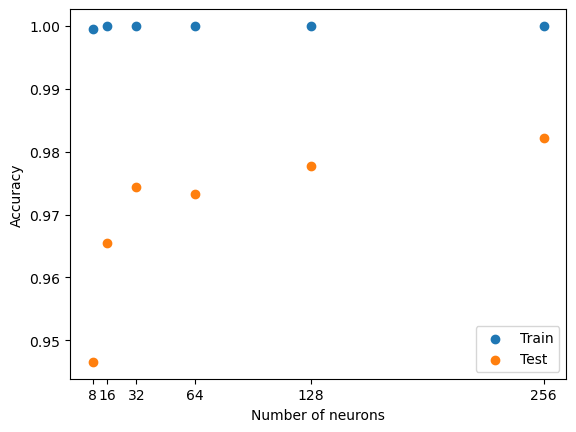

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
neuron_total = []
train_accuracies = []
test_accuracies = []
def train_model(neurons):
    neuron_total.append(neurons)
    mlpc = MLPClassifier(hidden_layer_sizes=(neurons,), random_state=2, max_iter=1500)
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)
    results = cross_validate(mlpc, X, y, cv=cv, return_train_score=True)
    train_accuracies.append(results['train_score'].mean())
    test_accuracies.append(results['test_score'].mean())

train_model(8)
train_model(16)
train_model(32)
train_model(64)
train_model(128)
train_model(256)

print(train_accuracies)
print(test_accuracies)

# Plot the train and test scores
plt.scatter(neuron_total, train_accuracies, label='Train')
plt.scatter(neuron_total, test_accuracies, label='Test')

# Add labels and a legend
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.xticks(neuron_total)
plt.legend()

plt.show()

This was true until I changed the cv parameter. All of the models perform better on the training set than the test set. Test performance is still pretty good. Interestingly test performance gets better until 32. Then it gets much worse at 64, but then it goes back up and 256 is the best score.

After trying normal KFold it continually increased.

Now after using stratified KFold performance drops and improves again, although it improves faster than it did when I originally used CV. 

Accuracy is good, but no better than it was when using K Nearest neighbors. (Maybe it's more computationally efficient? But it takes longer. Is that only trye for a large dataset?)

### Neural Network with two hidden layers

[0.9998145400593472, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9365602573620391, 0.9588195991091313, 0.9699492699826776, 0.9710640930462757, 0.97940856223707, 0.9816382083642663]


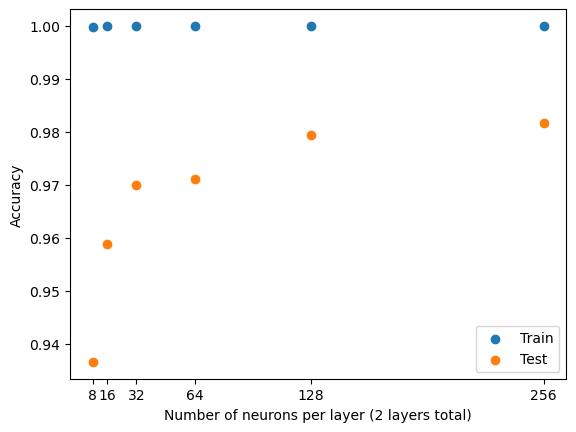

In [62]:
neuron_total = []
train_accuracies = []
test_accuracies = []
def train_model(neurons):
    neuron_total.append(neurons)
    mlpc = MLPClassifier(hidden_layer_sizes=(neurons,neurons), random_state=2, max_iter=1500)
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)
    results = cross_validate(mlpc, X, y, cv=cv, return_train_score=True)
    train_accuracies.append(results['train_score'].mean())
    test_accuracies.append(results['test_score'].mean())

train_model(8)
train_model(16)
train_model(32)
train_model(64)
train_model(128)
train_model(256)

print(train_accuracies)
print(test_accuracies)

# Plot the train and test scores
plt.scatter(neuron_total, train_accuracies, label='Train')
plt.scatter(neuron_total, test_accuracies, label='Test')

# Add labels and a legend
plt.xlabel('Number of neurons per layer (2 layers total)')
plt.ylabel('Accuracy')
plt.xticks(neuron_total)
plt.legend()

plt.show()

In all cases besides 128 neurons, performance is slightly worse with 2 layers. (The answer keys results improved. But I suspect what really happened is their results were worse before because they used fewer iterations. Since my results are 98% now and were that way before.)

[1.0, 1.0, 1.0]
[0.9504812337421034, 0.9727238944630251, 0.9782961724266072]


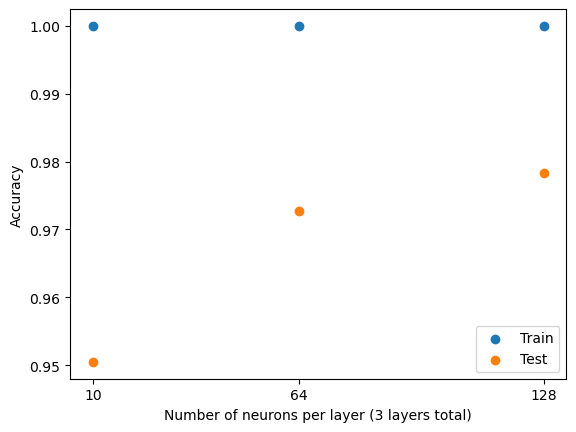

In [65]:
neuron_total = []
train_accuracies = []
test_accuracies = []
def train_model(neurons):
    neuron_total.append(neurons)
    mlpc = MLPClassifier(hidden_layer_sizes=(neurons,neurons,neurons), random_state=2, max_iter=1500)
    cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=2)
    results = cross_validate(mlpc, X, y, cv=cv, return_train_score=True)
    train_accuracies.append(results['train_score'].mean())
    test_accuracies.append(results['test_score'].mean())

# train_model(8)
train_model(10)
# train_model(16)
# train_model(32)
train_model(64)
train_model(128)
# train_model(256)

print(train_accuracies)
print(test_accuracies)

# Plot the train and test scores
plt.scatter(neuron_total, train_accuracies, label='Train')
plt.scatter(neuron_total, test_accuracies, label='Test')

# Add labels and a legend
plt.xlabel('Number of neurons per layer (3 layers total)')
plt.ylabel('Accuracy')
plt.xticks(neuron_total)
plt.legend()

plt.show()

Accuracy essentially didn't change.